In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Telcom-Customer-Churn.csv")

In [3]:
df=data.copy()
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [5]:
df.drop(["customerID"], axis=1, inplace=True)

In [6]:
#for col in df.columns:
#    if (df[col].dtype == object):
#        df[col].value_counts()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


Text(0.5, 1.0, 'Churn Numbers')

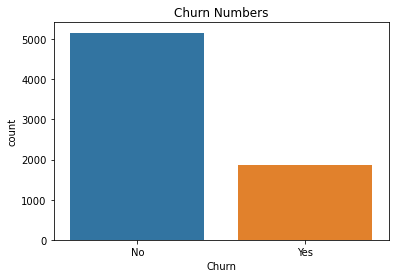

In [10]:
sns.countplot(df["Churn"])
plt.title("Churn Numbers")

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

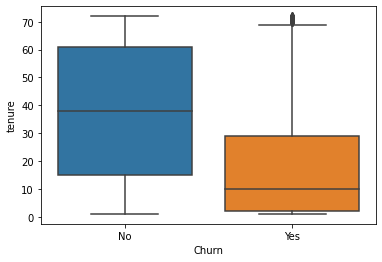

In [11]:
sns.boxplot(x=df["Churn"],y=df["tenure"],data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

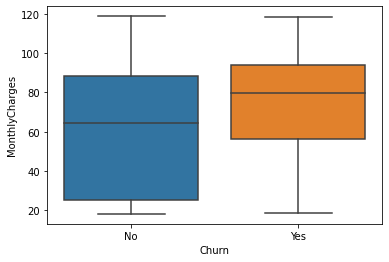

In [12]:
sns.boxplot(x=df["Churn"],y=df["MonthlyCharges"],data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

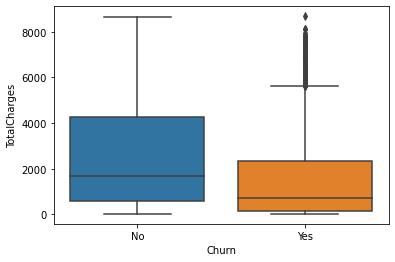

In [13]:
sns.boxplot(x=df["Churn"],y=df["TotalCharges"],data=df)

<AxesSubplot:xlabel='TotalCharges'>

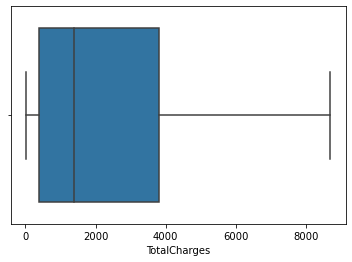

In [14]:
sns.boxplot(df['TotalCharges'])

In [15]:
df["MultipleLines"].replace({"No phone service":"No"}, inplace=True)
df["OnlineSecurity"].replace({"No internet service":"No"}, inplace=True)
df["OnlineBackup"].replace({"No internet service":"No"}, inplace=True)
df["DeviceProtection"].replace({"No internet service":"No"}, inplace=True)
df["TechSupport"].replace({"No internet service":"No"}, inplace=True)
df["StreamingTV"].replace({"No internet service":"No"}, inplace=True)
df["StreamingMovies"].replace({"No internet service":"No"}, inplace=True)

In [16]:
df["Churn"].replace({"No":"0", "Yes":"1"}, inplace=True)
df.SeniorCitizen = df["SeniorCitizen"].astype("category")
df["SeniorCitizen"].replace({0:"No", 1:"Yes"}, inplace=True)
df.Churn = pd.to_numeric(df.Churn, errors='coerce')

In [17]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [18]:
def metric_cal(y_train,y_hat_train,y_test,y_hat_test):
    precision_train = precision_score(y_train, y_hat_train)
    precision_test = precision_score(y_test, y_hat_test)
    print("Precision Score")
    print("Training:",precision_train)
    print("Test:",precision_test,"\n")
    recall_train = recall_score(y_train, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)
    print("Recall Score")
    print("Training:",recall_train)
    print("Test:",recall_test,"\n")
    accuracy_train = accuracy_score(y_train, y_hat_train)
    accuracy_test = accuracy_score(y_test, y_hat_test)
    print("Accuracy Score")
    print("Training:",accuracy_train)
    print("Test:",accuracy_test,"\n")
    f1_train = f1_score(y_train, y_hat_train)
    f1_test = f1_score(y_test, y_hat_test)
    print("F1 Score")
    print("Training:",f1_train)
    print("Test:",f1_test)

In [19]:
def plot_roc(y_train,y_hat_train,y_test,y_hat_test):
    fpr_train, tpr_train, threshold_train = roc_curve(y_train,  y_hat_train[:,1], pos_label=1)
    fpr_test, tpr_test, threshold_test = roc_curve(y_test,  y_hat_test[:,1], pos_label=1)
    plt.plot(fpr_train,tpr_train)
    plt.title('Receiver Operating Characteristic for Training')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.plot(fpr_test,tpr_test)
    plt.title('Receiver Operating Characteristic for Test')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [20]:
Y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 10)

Logistics Regression

In [22]:
logreg = LogisticRegression()
result=logreg.fit(X_train, y_train)

In [23]:
y_lr_train = logreg.predict(X_train)
y_lr_test = logreg.predict(X_test)
y_lr_train_probs = logreg.predict_proba(X_train)
y_lr_test_probs = logreg.predict_proba(X_test)

In [24]:
cnf_matrix = confusion_matrix(y_test, y_lr_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1160  137]
 [ 195  266]]


In [25]:
metric_cal(y_train,y_lr_train,y_test,y_lr_test)

Precision Score
Training: 0.654468085106383
Test: 0.6600496277915633 

Recall Score
Training: 0.5461647727272727
Test: 0.5770065075921909 

Accuracy Score
Training: 0.8018581721653394
Test: 0.8111490329920364 

F1 Score
Training: 0.5954316686024003
Test: 0.6157407407407407


In [26]:
print("Classification report for Train")
print(classification_report(y_train,y_lr_train))
print("Classification report for Test")
print(classification_report(y_test,y_lr_test))

Classification report for Train
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3866
           1       0.65      0.55      0.60      1408

    accuracy                           0.80      5274
   macro avg       0.75      0.72      0.73      5274
weighted avg       0.79      0.80      0.80      5274

Classification report for Test
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1297
           1       0.66      0.58      0.62       461

    accuracy                           0.81      1758
   macro avg       0.76      0.74      0.75      1758
weighted avg       0.80      0.81      0.81      1758



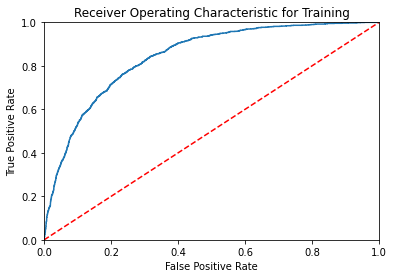

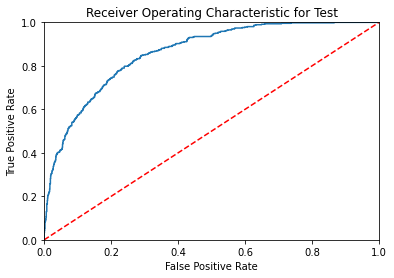

In [27]:
plot_roc(y_train,y_lr_train_probs,y_test,y_lr_test_probs)

Decision Tree

In [28]:
dtree=DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)
y_dt_train = dtree.predict(X_train)
y_dt_test = dtree.predict(X_test)

In [30]:
cnf_matrix = confusion_matrix(y_test, y_dt_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1058  239]
 [ 222  239]]


In [31]:
metric_cal(y_train,y_dt_train,y_test,y_dt_test)

Precision Score
Training: 0.9992846924177397
Test: 0.5 

Recall Score
Training: 0.9921875
Test: 0.5184381778741866 

Accuracy Score
Training: 0.9977246871444824
Test: 0.7377701934015927 

F1 Score
Training: 0.9957234497505345
Test: 0.5090521831735889


In [32]:
print("Classification report for Train")
print(classification_report(y_train,y_dt_train))
print("Classification report for Test")
print(classification_report(y_test,y_dt_test))

Classification report for Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3866
           1       1.00      0.99      1.00      1408

    accuracy                           1.00      5274
   macro avg       1.00      1.00      1.00      5274
weighted avg       1.00      1.00      1.00      5274

Classification report for Test
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1297
           1       0.50      0.52      0.51       461

    accuracy                           0.74      1758
   macro avg       0.66      0.67      0.67      1758
weighted avg       0.74      0.74      0.74      1758



Random Forest

In [33]:
rfc=clf = RandomForestClassifier(n_estimators=30 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 50)

In [34]:
rfc.fit(X_train,y_train)
y_rfc_train = rfc.predict(X_train)
y_rfc_test = rfc.predict(X_test)
y_rfc_train_probs = rfc.predict_proba(X_train)
y_rfc_test_probs = rfc.predict_proba(X_test)

In [35]:
cnf_matrix = confusion_matrix(y_test, y_rfc_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1198   99]
 [ 234  227]]


In [36]:
metric_cal(y_train,y_rfc_train,y_test,y_rfc_test)

Precision Score
Training: 0.7001067235859125
Test: 0.696319018404908 

Recall Score
Training: 0.4659090909090909
Test: 0.4924078091106291 

Accuracy Score
Training: 0.804133485020857
Test: 0.810580204778157 

F1 Score
Training: 0.5594882729211088
Test: 0.576874205844981


In [37]:
print("Classification report for Train")
print(classification_report(y_train,y_rfc_train))
print("Classification report for Test")
print(classification_report(y_test,y_rfc_test))

Classification report for Train
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3866
           1       0.70      0.47      0.56      1408

    accuracy                           0.80      5274
   macro avg       0.76      0.70      0.72      5274
weighted avg       0.79      0.80      0.79      5274

Classification report for Test
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1297
           1       0.70      0.49      0.58       461

    accuracy                           0.81      1758
   macro avg       0.77      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



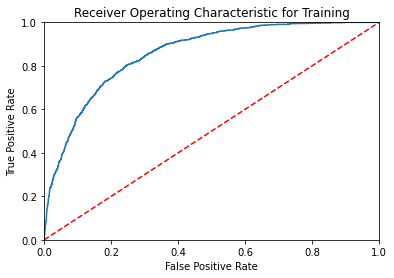

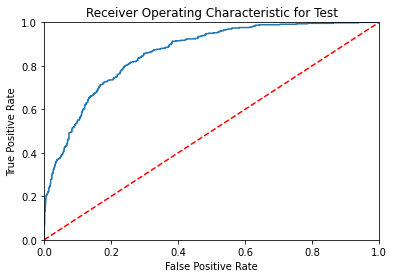

In [38]:
plot_roc(y_train,y_rfc_train_probs,y_test,y_rfc_test_probs)